In [2]:
!ls

CONTRIBUTING.md        Untitled2.ipynb        scraper2-Copy1.ipynb
LICENSE.md             awesome.gif            scraper2.ipynb
README.md              initial_eda.ipynb      student.ipynb
Some Initial EDA.ipynb movie_data_erd.jpeg    zippedData
Untitled.ipynb         omdb api test.ipynb
Untitled1.ipynb        scrape_imDb.ipynb


In [3]:
!ls zippedData

bom.movie_gross.csv.gz  rt.movie_info.tsv.gz    tmdb.movies.csv.gz
im.db                   rt.reviews.tsv.gz       tn.movie_budgets.csv.gz
im.db.zip               title.basics.tsv.gz


In [4]:
import pandas as pd
import numpy as np
import sqlite3

In [5]:
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [6]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [40]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [7]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [8]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [10]:
tmdb = pd.read_csv('zippedData/tmdb.movies.csv.gz')

In [11]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
conn = sqlite3.connect('zippedData/im.db')

In [13]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type = 'table'", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [31]:
imdb_df = pd.read_sql("""SELECT * FROM movie_basics""", conn)

In [32]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [33]:
imdb_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [34]:
imdb_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [43]:
imdb_merge = imdb_df.merge(bom_df, left_on=['primary_title', 'start_year'], right_on=['title', 'year'], how='inner')

In [44]:
tn_df['year'] = tn_df['release_date'].map(lambda x: int(x[-4:]))

In [45]:
imdb_merge = imdb_merge.merge(tn_df, left_on=['primary_title', 'start_year'], right_on=['movie', 'year'], how='inner')

In [46]:
imdb_merge.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross_x,foreign_gross,year_x,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,year_y
0,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",2013
1,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",2014
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",2015
3,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",The Rum Diary,FD,13100000.0,10800000,2011,16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",2011
4,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",The Three Stooges,Fox,44300000.0,10500000,2012,4,"Apr 13, 2012",The Three Stooges,"$30,000,000","$44,338,224","$54,052,249",2012


In [47]:
imdb_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1051
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1052 non-null   object 
 1   primary_title      1052 non-null   object 
 2   original_title     1052 non-null   object 
 3   start_year         1052 non-null   int64  
 4   runtime_minutes    1047 non-null   float64
 5   genres             1051 non-null   object 
 6   title              1052 non-null   object 
 7   studio             1052 non-null   object 
 8   domestic_gross_x   1051 non-null   float64
 9   foreign_gross      948 non-null    object 
 10  year_x             1052 non-null   int64  
 11  id                 1052 non-null   int64  
 12  release_date       1052 non-null   object 
 13  movie              1052 non-null   object 
 14  production_budget  1052 non-null   object 
 15  domestic_gross_y   1052 non-null   object 
 16  worldwide_gross    1052 

In [23]:
imdb_merge.describe()

,start_year,runtime_minutes,domestic_gross_x,year_x,id,year_y
count,1052.000000,1047.000000,1.051000e+03,1052.000000,1052.000000,1052.000000
mean,2013.664449,109.494747,6.869438e+07,2013.664449,51.116920,2013.664449
std,2.548586,18.361510,8.919429e+07,2.548586,28.232564,2.548586
min,2010.000000,5.000000,1.000000e+03,2010.000000,1.000000,2010.000000
25%,2011.000000,97.000000,1.390000e+07,2011.000000,27.000000,2011.000000
50%,2014.000000,107.000000,3.900000e+07,2014.000000,51.000000,2014.000000
75%,2016.000000,120.000000,8.360000e+07,2016.000000,75.000000,2016.000000
max,2018.000000,180.000000,7.001000e+08,2018.000000,100.000000,2018.000000


In [24]:
imdb_merge.sort_values('domestic_gross_x', ascending=False).head(20)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,title,studio,domestic_gross_x,foreign_gross,year_x,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,year_y
556,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",Black Panther,BV,700100000.0,646900000,2018,42,"Feb 16, 2018",Black Panther,"$200,000,000","$700,059,566","$1,348,258,224",2018
925,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Avengers: Infinity War,BV,678800000.0,"1,369.5",2018,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018
2,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",Jurassic World,Uni.,652300000.0,"1,019.4",2015,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",2015
879,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",Incredibles 2,BV,608600000.0,634200000,2018,44,"Jun 15, 2018",Incredibles 2,"$200,000,000","$608,581,744","$1,242,520,711",2018
894,tt3748528,Rogue One: A Star Wars Story,Rogue One,2016,133.0,"Action,Adventure,Sci-Fi",Rogue One: A Star Wars Story,BV,532200000.0,523900000,2016,45,"Dec 16, 2016",Rogue One: A Star Wars Story,"$200,000,000","$532,177,324","$1,049,102,856",2016
696,tt2277860,Finding Dory,Finding Dory,2016,97.0,"Adventure,Animation,Comedy",Finding Dory,BV,486300000.0,542300000,2016,46,"Jun 17, 2016",Finding Dory,"$200,000,000","$486,295,561","$1,021,215,193",2016
742,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Avengers: Age of Ultron,BV,459000000.0,946400000,2015,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
263,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",The Dark Knight Rises,WB,448100000.0,636800000,2012,11,"Jul 20, 2012",The Dark Knight Rises,"$275,000,000","$448,139,099","$1,084,439,099",2012
598,tt1951264,The Hunger Games: Catching Fire,The Hunger Games: Catching Fire,2013,146.0,"Action,Adventure,Sci-Fi",The Hunger Games: Catching Fire,LGF,424700000.0,440300000,2013,38,"Nov 22, 2013",The Hunger Games: Catching Fire,"$130,000,000","$424,668,047","$864,868,047",2013
980,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,"$170,000,000","$417,719,760","$1,305,772,799",2018


In [26]:
tn_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [27]:
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [28]:
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [59]:
budget_merge = tn_df.merge(bom_df, left_on=['movie', 'year'], right_on=['title', 'year'], how='inner')
budget_merge = budget_merge.merge(imdb_df, left_on=['movie', 'year'], right_on=['primary_title', 'start_year'], how='left')
budget_merge

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,year,title,studio,domestic_gross_y,foreign_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,Avengers: Age of Ultron,BV,459000000.0,946400000,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,Avengers: Infinity War,BV,678800000.0,"1,369.5",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,Justice League,WB,229000000.0,428900000,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",2015,Spectre,Sony,200100000.0,680600000,tt2379713,Spectre,Spectre,2015.0,148.0,"Action,Adventure,Thriller"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,68,"Apr 27, 2012",Sound of My Voice,"$135,000","$408,015","$429,448",2012,Sound of My Voice,FoxS,408000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1236,73,"Jun 15, 2012",Your Sister's Sister,"$120,000","$1,597,486","$3,090,593",2012,Your Sister's Sister,IFC,1600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1237,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410","$41,656,474",2015,The Gallows,WB (NL),22800000.0,20200000,tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller"
1238,86,"Jul 7, 2017",A Ghost Story,"$100,000","$1,594,798","$2,769,782",2017,A Ghost Story,A24,1600000.0,NaN,tt6265828,A Ghost Story,A Ghost Story,2017.0,92.0,"Drama,Fantasy,Romance"


In [65]:
imdb_merge = imdb_df.merge(tn_df, left_on=['primary_title', 'start_year'], right_on=['movie', 'year'])

In [66]:
imdb_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year
0,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706",2012
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183",2013
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587",2014
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864",2015
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732",2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,tt8364368,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",16,"Jul 12, 2019",Crawl,"$17,000,000",$0,$0,2019
1543,tt8408152,Detention,Detention,2012,NaN,Horror,45,"Apr 13, 2012",Detention,"$10,000,000",$0,$0,2012
1544,tt8632862,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,29,"Sep 21, 2018",Fahrenheit 11/9,"$5,000,000","$6,352,306","$6,653,715",2018
1545,tt8852552,Icarus,Icarus,2010,78.0,Thriller,91,"Feb 9, 2010",Icarus,"$6,000,000",$0,$0,2010


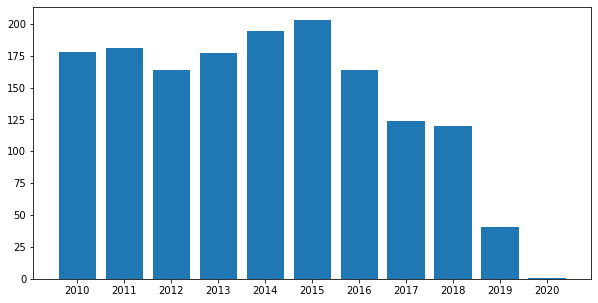

In [94]:
import matplotlib.pyplot as plt

movies_per_year = imdb_merge['start_year'].value_counts()

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(movies_per_year.index,movies_per_year)
ax.set_xticks(movies_per_year.index)
plt.show()
